In [18]:
from ucimlrepo import fetch_ucirepo
import numpy as np

# plot histogram
import matplotlib.pyplot as plt

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
# # metadata
# print(abalone.metadata)
# # variable information
# print(abalone.variables)

# get Length column
Length = X["Length"]

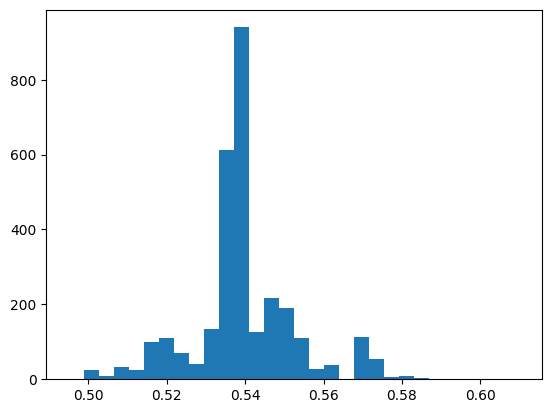

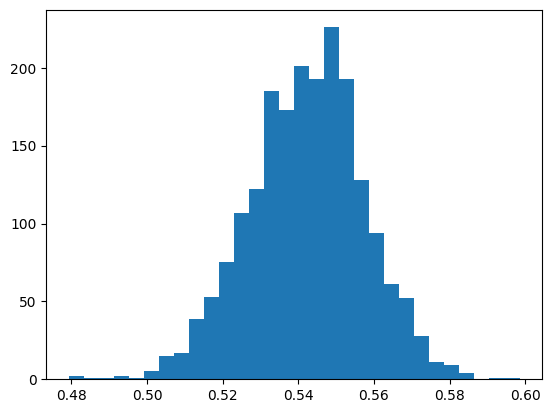

0.888
0.545
0.01608815344329239


In [21]:
median = np.median(Length)

inside_90_count = 0
bs_median_means = np.zeros(2000)
bs_average_std_error = np.zeros(2000)

sample_size = 100

for i in range(2000):
    sample = np.random.choice(Length, size=sample_size, replace=False)

    # 3000 bootstrap replicates
    bs_replica = np.random.choice(sample, size=(3000, sample_size), replace=True)

    # calculate median of each bootstrap replicate
    bs_median = np.median(bs_replica, axis=1)

    # mean of bs_median
    bs_median_mean = np.mean(bs_median)
    bs_median_means[i] = bs_median_mean

    # std error of bs_median
    bs_median_std_error = np.std(bs_median, ddof=1)
    bs_average_std_error[i] = bs_median_std_error

    # calculate the 90% confidence interval
    bs_median_low, bs_median_high = bs_median_mean - 1.64485 * bs_median_std_error, bs_median_mean + 1.64485 * bs_median_std_error

    if bs_median_low <= median <= bs_median_high:
        inside_90_count += 1

    if i == 0:
        # plot the histogram of bs_median
        plt.hist(bs_median, bins=30)
        plt.show()


plt.hist(bs_median_means, bins=30)
plt.show()

print(inside_90_count / 2000)
print(median)
print(bs_average_std_error.mean())

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

income = y["income"]
sex = X["sex"]
education = X["education"]
income = income.str.replace('\.$', '', regex=True)


In [14]:
# use chi-square test to test the independence of income with respect to gender

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'income' and 'education' are pandas Series objects

# Create a contingency table
contingency_table = pd.crosstab(education, income)

# Apply the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Contingency Table:
income        <=50K  >50K
education                
10th           1302    87
11th           1720    92
12th            609    48
1st-4th         239     8
5th-6th         482    27
7th-8th         893    62
9th             715    41
Assoc-acdm     1188   413
Assoc-voc      1539   522
Bachelors      4712  3313
Doctorate       163   431
HS-grad       13281  2503
Masters        1198  1459
Preschool        82     1
Prof-school     217   617
Some-college   8815  2063
Chi-square Statistic: 6537.972961360963
P-value: 0.0
Degrees of Freedom: 15


In [15]:
# Create a contingency table
contingency_table = pd.crosstab(sex, income)

# Apply the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Contingency Table:
income  <=50K  >50K
sex                
Female  14423  1769
Male    22732  9918
Chi-square Statistic: 2248.847679013691
P-value: 0.0
Degrees of Freedom: 1
